In [133]:
import numpy as np
import pandas as pd
import os
import requests
import time 
import matplotlib.pyplot as plt

In [134]:
# file_url = "tinder_data_tracking_data_TEMP_DATA_SAVE.txt"

In [135]:
# os.listdir(".")

In [136]:
# data_txt = open("tinder_data_tracking_data_TEMP_DATA_SAVE.txt").read()

In [137]:
## Trying to fetch the file from the net instead 

In [138]:
url = "http://sourisr.kapsi.fi/boras5/ip.txt"

In [139]:
data_txt = requests.get( url ).text

In [140]:
data_txt = data_txt.replace("__", "" )
data_txt = data_txt.replace("0_5", "0" )
data_txt = data_txt.replace("test", "0" )

In [141]:
# data_text

In [142]:
data_txt[ : 10 ]

'1536328189'

In [143]:
data_txt2 = data_txt.split(" ")
data_txt2[ :10 ]

['1536328189;93.106.250.108;/boras5/save_url_0_01.php?0;',
 '1536328189;93.106.250.108;/boras5/save_url_0_01.php?1;',
 '1536328189;93.106.250.108;/boras5/save_url_0_01.php?2;',
 '1536328310;93.106.250.108;/boras5/save_url_0_01.php?3;',
 '1536328312;93.106.250.108;/boras5/save_url_0_01.php?4;',
 '1536328903;93.106.250.108;/boras5/save_url_0_01.php?5;',
 '1536328906;93.106.250.108;/boras5/save_url_0_01.php?6;',
 '1536329471;2001:16b8:464a:f101:4cd:8148:8278:c24a;/boras5/save_url_0_01.php?0;',
 '1536329474;2001:16b8:464a:f101:4cd:8148:8278:c24a;/boras5/save_url_0_01.php?1;',
 '1536329479;2001:16b8:464a:f101:4cd:8148:8278:c24a;/boras5/save_url_0_01.php?2;']

In [144]:
data_txt3 = []

In [145]:
for line in data_txt2:
    data_txt3.append( line.split(";") )

In [146]:
data_txt3[ :10 ]

[['1536328189', '93.106.250.108', '/boras5/save_url_0_01.php?0', ''],
 ['1536328189', '93.106.250.108', '/boras5/save_url_0_01.php?1', ''],
 ['1536328189', '93.106.250.108', '/boras5/save_url_0_01.php?2', ''],
 ['1536328310', '93.106.250.108', '/boras5/save_url_0_01.php?3', ''],
 ['1536328312', '93.106.250.108', '/boras5/save_url_0_01.php?4', ''],
 ['1536328903', '93.106.250.108', '/boras5/save_url_0_01.php?5', ''],
 ['1536328906', '93.106.250.108', '/boras5/save_url_0_01.php?6', ''],
 ['1536329471',
  '2001:16b8:464a:f101:4cd:8148:8278:c24a',
  '/boras5/save_url_0_01.php?0',
  ''],
 ['1536329474',
  '2001:16b8:464a:f101:4cd:8148:8278:c24a',
  '/boras5/save_url_0_01.php?1',
  ''],
 ['1536329479',
  '2001:16b8:464a:f101:4cd:8148:8278:c24a',
  '/boras5/save_url_0_01.php?2',
  '']]

In [147]:
len( data_txt3 ) 

1330

In [148]:
data_txt3[0]

['1536328189', '93.106.250.108', '/boras5/save_url_0_01.php?0', '']

In [149]:
for line in data_txt3:
    line[0] = int( line[0] ) 
    line[2] = line[2].split("?")[-1]
    line[3] = time.asctime( time.localtime( int( line[0] ) ) ) 

In [150]:
data_txt3[ :10 ]

[[1536328189, '93.106.250.108', '0', 'Fri Sep  7 15:49:49 2018'],
 [1536328189, '93.106.250.108', '1', 'Fri Sep  7 15:49:49 2018'],
 [1536328189, '93.106.250.108', '2', 'Fri Sep  7 15:49:49 2018'],
 [1536328310, '93.106.250.108', '3', 'Fri Sep  7 15:51:50 2018'],
 [1536328312, '93.106.250.108', '4', 'Fri Sep  7 15:51:52 2018'],
 [1536328903, '93.106.250.108', '5', 'Fri Sep  7 16:01:43 2018'],
 [1536328906, '93.106.250.108', '6', 'Fri Sep  7 16:01:46 2018'],
 [1536329471,
  '2001:16b8:464a:f101:4cd:8148:8278:c24a',
  '0',
  'Fri Sep  7 16:11:11 2018'],
 [1536329474,
  '2001:16b8:464a:f101:4cd:8148:8278:c24a',
  '1',
  'Fri Sep  7 16:11:14 2018'],
 [1536329479,
  '2001:16b8:464a:f101:4cd:8148:8278:c24a',
  '2',
  'Fri Sep  7 16:11:19 2018']]

In [151]:
time.asctime( time.localtime( 1536473515 ) ) 

'Sun Sep  9 08:11:55 2018'

In [152]:
df = pd.DataFrame( data_txt3 )

In [153]:
df.columns = ['epoch_time', 'ip', 'screen_num', 'time_as_string']

In [154]:
df[:10]

,epoch_time,ip,screen_num,time_as_string
0,1536328189,93.106.250.108,0,Fri Sep 7 15:49:49 2018
1,1536328189,93.106.250.108,1,Fri Sep 7 15:49:49 2018
2,1536328189,93.106.250.108,2,Fri Sep 7 15:49:49 2018
3,1536328310,93.106.250.108,3,Fri Sep 7 15:51:50 2018
4,1536328312,93.106.250.108,4,Fri Sep 7 15:51:52 2018
5,1536328903,93.106.250.108,5,Fri Sep 7 16:01:43 2018
6,1536328906,93.106.250.108,6,Fri Sep 7 16:01:46 2018
7,1536329471,2001:16b8:464a:f101:4cd:8148:8278:c24a,0,Fri Sep 7 16:11:11 2018
8,1536329474,2001:16b8:464a:f101:4cd:8148:8278:c24a,1,Fri Sep 7 16:11:14 2018
9,1536329479,2001:16b8:464a:f101:4cd:8148:8278:c24a,2,Fri Sep 7 16:11:19 2018


In [155]:
df.ip.unique().shape

(91,)

In [156]:
df.screen_num = df.screen_num.apply( pd.to_numeric )

In [157]:
type( df.screen_num[0] )

numpy.int64

In [158]:
df.epoch_time.unique().shape

(1288,)

In [159]:
# plt.hist( df.epoch_time.unique() )

In [160]:
df.screen_num.shape

(1330,)

In [161]:
df.screen_num.unique()

array([ 0,  1,  2,  3,  4,  5,  6, 13, 14, 15, 16, 17, 18,  7,  8,  9, 10,
       11, 12])

In [162]:
df[ df.screen_num == 18 ]

,epoch_time,ip,screen_num,time_as_string
24,1536330124,77.238.61.100,18,Fri Sep 7 16:22:04 2018
68,1536331994,193.12.72.184,18,Fri Sep 7 16:53:14 2018
89,1536333106,217.214.152.255,18,Fri Sep 7 17:11:46 2018
127,1536335217,78.71.214.199,18,Fri Sep 7 17:46:57 2018
150,1536335902,83.252.97.31,18,Fri Sep 7 17:58:22 2018
169,1536335973,83.252.97.31,18,Fri Sep 7 17:59:33 2018
200,1536336147,78.71.214.199,18,Fri Sep 7 18:02:27 2018
240,1536339271,83.233.2.218,18,Fri Sep 7 18:54:31 2018
248,1536339464,77.238.61.100,18,Fri Sep 7 18:57:44 2018
271,1536340732,94.234.50.247,18,Fri Sep 7 19:18:52 2018


In [163]:
df[ df.screen_num == 18 ].shape

(52, 4)

(array([266., 155., 140., 132.,  66., 125., 120., 116., 106., 104.]),
 array([ 0. ,  1.8,  3.6,  5.4,  7.2,  9. , 10.8, 12.6, 14.4, 16.2, 18. ]),
 <a list of 10 Patch objects>)

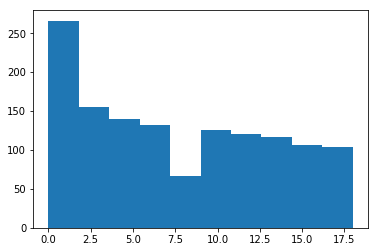

In [164]:
plt.hist( df.screen_num )